<a href="https://colab.research.google.com/github/123-VARSHA/Exploratory-Data-Analysis-Capstone/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data from google drive
df = pd.read_csv('/content/drive/My Drive/ALMABETTER/CAPSTONE PROJECT/EDA Capstone/Hotel Bookings.csv')

## Data Exploration

In [4]:
# display head
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# display tail
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# check shape of data
df.shape

(119390, 32)

In [8]:
# print name of columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# check number of unique values in each column
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [10]:
# view data according to arrival_date_month and arrival_date_year
df.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                5428         5428       5428   
                   2017                5661         5661       5661   
August             2015                3889         3889       3889   
                   2016                5063         5063       5063   
                   2017                4925         4925       4925   
December           2015                2920         2920       2920   
                   2016                3860         3860       3860   
February           2016                3891         3891       3891   
                   2017                4177         4177       4177   
January            2016                2248         2248       2248   
                   2017                3681         3681       3681   
July               2015                2776         2776       2776   
                   2016                4572         4572       4572   
                   2017                5313         5313       5313   
June               2016                5292         5292       5292   
                   2017                5647         5647       5647   
March              2016                4824         4824       4824   
                   2017                4970         4970       4970   
May                2016                5478         5478       5478   
                   2017                6313         6313       6313   
November           2015                2340         2340       2340   
                   2016                4454         4454       4454   
October            2015                4957         4957       4957   
                   2016                6203         6203       6203   
September          2015                5114         5114       5114   
                   2016                5394         5394       5394   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   5428   
                   2017                                   5661   
August             2015                                   3889   
                   2016                                   5063   
                   2017                                   4925   
December           2015                                   2920   
                   2016                                   3860   
February           2016                                   3891   
                   2017                                   4177   
January            2016                                   2248   
                   2017                                   3681   
July               2015                                   2776   
                   2016                                   4572   
                   2017                                   5313   
June               2016                                   5292   
                   2017                                   5647   
March              2016                                   4824   
                   2017                                   4970   
May                2016                                   5478   
                   2017                                   6313   
November           2015                                   2340   
                   2016                                   4454   
October            2015                                   4957   
                   2016                                   6203   
September          2015                                   5114   
                   2016                                   5394   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    5428   

In [11]:
# get the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Cleaning the Dataset

In [12]:
df.shape

(119390, 32)

In [13]:
# drop the duplicates
df.drop_duplicates(inplace = True)

In [14]:
# chrck the shape of data after dropping duplicates
df.shape

(87396, 32)

In [15]:
# storing the selected columns for further analysis
selected_columns= ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [16]:
# assigning selected columns to new variable
bookings_df = df[selected_columns].copy()

In [17]:
# checking for null values
bookings_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
deposit_type                        0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

##We can see the null values through heat map also.

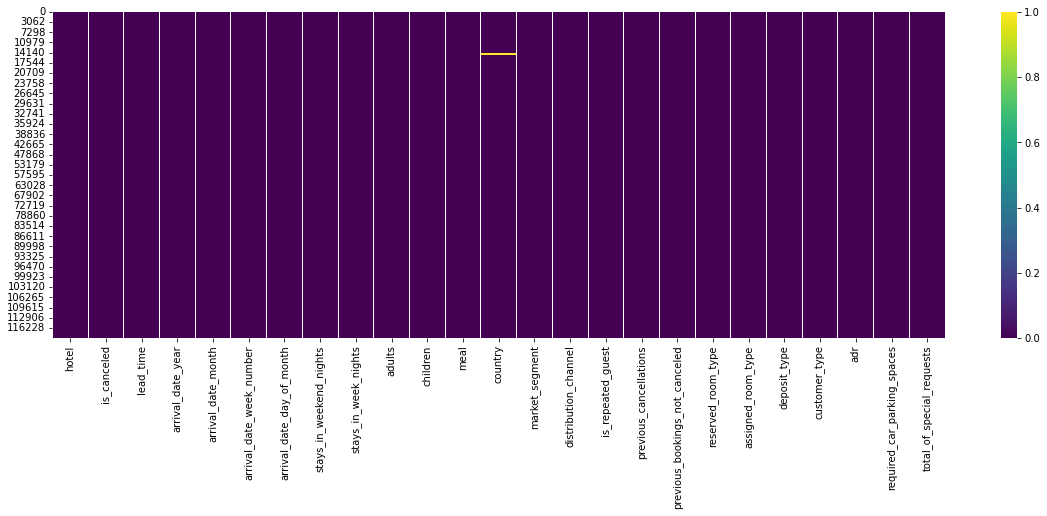

In [18]:
# visualizing null values using heatmap
plt.figure(figsize=(20,6))
sns.heatmap(bookings_df.isnull(),cmap='viridis')

In [19]:
# handeling null values
bookings_df['children'].fillna(0,inplace=True)
bookings_df['country'].fillna('XYZ',inplace=True)
bookings_df['children'] = bookings_df['children'].astype(int)

In [20]:
# merge adults and children columns to get total number of guests
bookings_df['Total_Guests'] = bookings_df['adults'] + bookings_df['children']

In [21]:
# drop adults and children column as these columns will not be used further
bookings_df = bookings_df.drop(['adults', 'children'], axis=1)

In [22]:
# exclude rows having 0 guests in Total_Guests column
bookings_df= bookings_df[bookings_df.Total_Guests > 0]

In [23]:
# display head of selected columns
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,0,A,C,No Deposit,Transient,75.0,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,0,A,A,No Deposit,Transient,75.0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,0,A,A,No Deposit,Transient,98.0,0,1,2


In [24]:
# check the shape of data in selected columns
bookings_df.shape

(87230, 24)

#**Exploratory Data Analysis**

##Histogram for Each Numerical Data Count

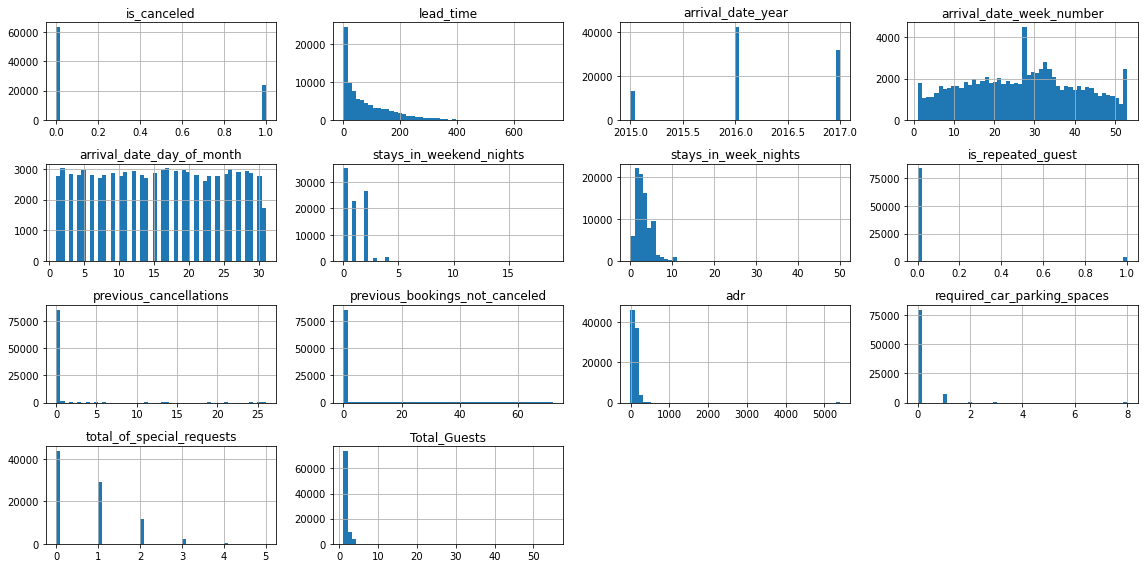

In [25]:
# plot histogram for each numerical data count
bookings_df.hist(bins=50, figsize=(16,8))
plt.tight_layout()
plt.show()

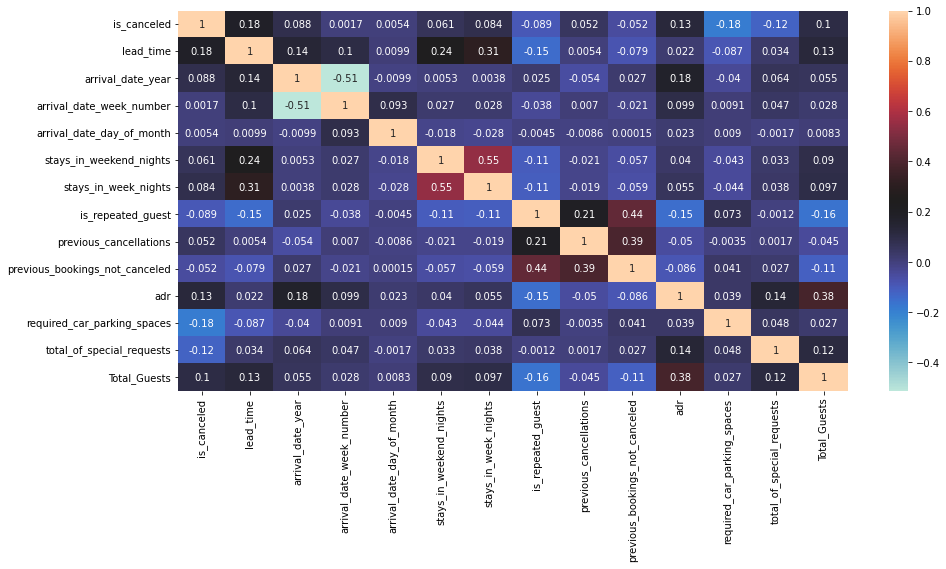

In [26]:
# correlation of data
plt.figure(figsize = (15,7))
correlation = bookings_df.corr()
sns.heatmap(correlation, annot = True, cmap = 'icefire')

##Separating and creating different datasets of both the hotel types.


In [27]:
# check unique values in 'hotel' column
bookings_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Types of Hotel')

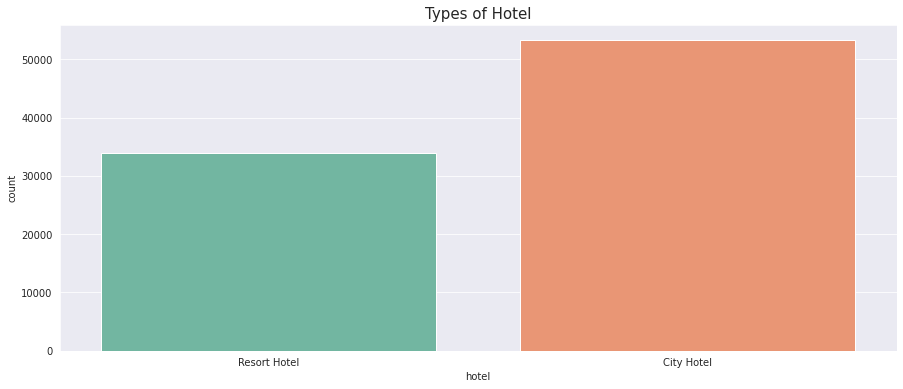

In [28]:
# plot graph for types of hotels
plt.figure(figsize = (15,6))
sns.set_style('darkgrid')
sns.countplot(bookings_df.hotel,palette='Set2')
plt.title('Types of Hotel',fontsize=15)

In [29]:
# select only those rows which do not have booking cancellations.
df= bookings_df[bookings_df.is_canceled == 0]
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
97780,City Hotel,0,6,2016,September,39,19,1,1,BB,...,0,0,A,A,No Deposit,Transient,129.7,0,0,1


In [30]:
# create different datasets of both the hotel types
resorthotel_df = df [df.hotel == "Resort Hotel"]
cityhotel_df= df [df.hotel == "City Hotel"]

##Hotel wise yearly bookings

Text(0.5, 1.0, 'Yearly Bookings')

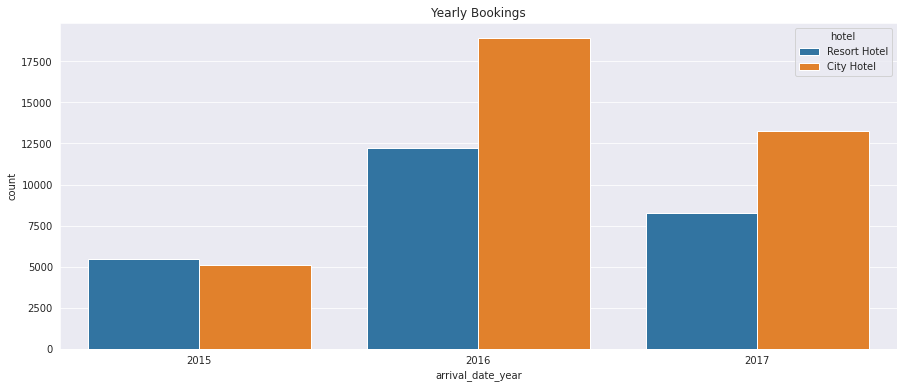

In [31]:
# plot hotel wise yearly bookings
plt.figure(figsize=(15,6))
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('Yearly Bookings')

Bookings across the years 2016 and 2017 is higher for City Hotel compared to Resort Hotel and do not increase proportionately over the years.

##Top countries from where the most guests are coming 

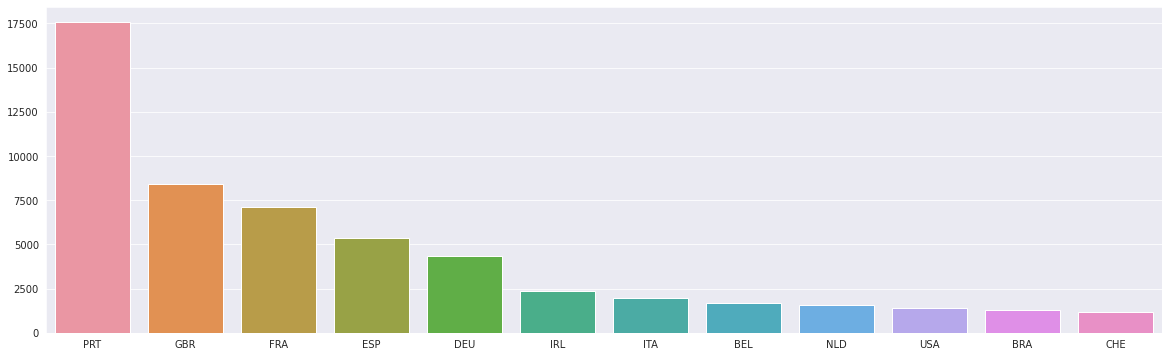

In [32]:
# plot top countries from where guests are coming
plt.figure(figsize = (20,6))
sns.barplot (y= list(df.country.value_counts().head(12)), x= list(df.country.value_counts().head(12).index))

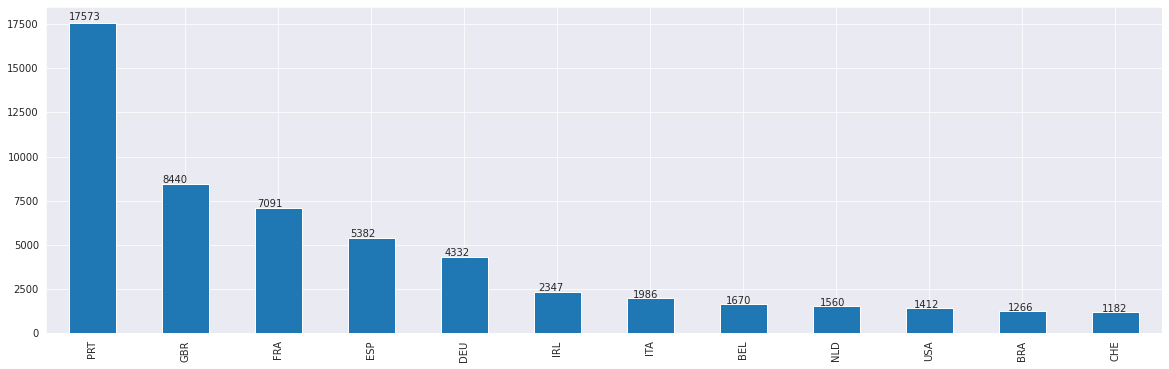

In [34]:
# plotting graph again with values 
plt.figure(figsize = (20,6))
ax= df.country.value_counts().head(12).plot (kind= 'bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

##Proportion of booking cancellations

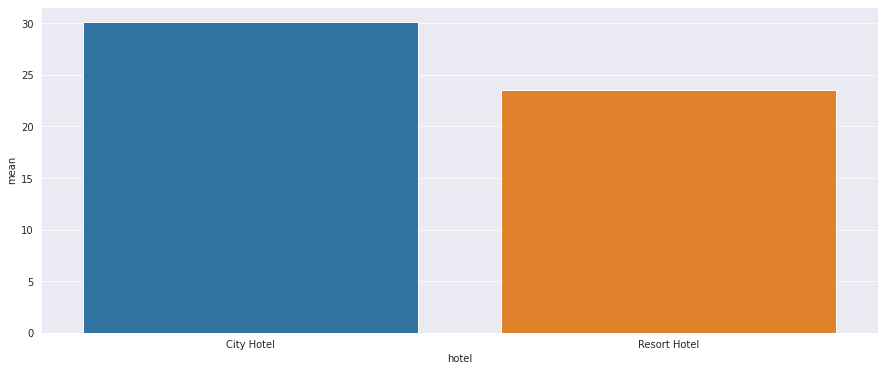

In [35]:
# plot proportion of booking cancellations
plt.figure(figsize=(15,6))
a = bookings_df.groupby("hotel")['is_canceled'].describe()
sns.barplot(x=a.index, y=a["mean"] * 100)

Around 30%  of bookings were cancelled in City Hotels and 25% in Resort Hotels.

##Relationship between previous cancellations and cancellation

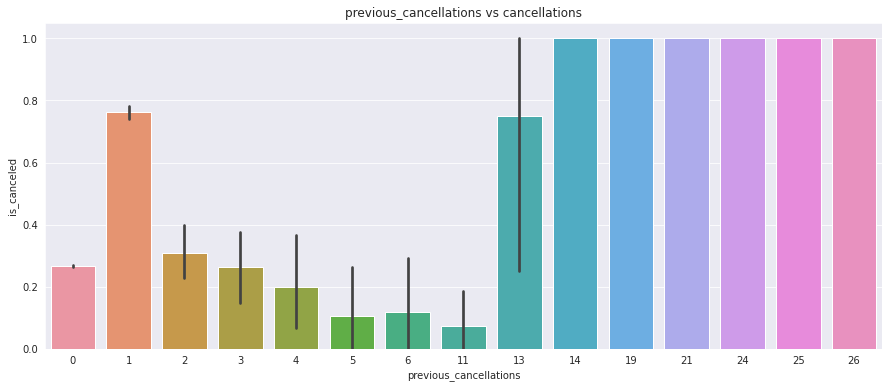

In [36]:
# previous cancellations vs cancellattions
plt.figure(figsize=(15,6))
plt.title ('previous_cancellations vs cancellations')
sns.barplot(x= 'previous_cancellations' ,y = "is_canceled", data = bookings_df)

##Visualizing monthly bookings and monthly cancellations

Text(0.5, 1.0, 'Monthly Bookings')

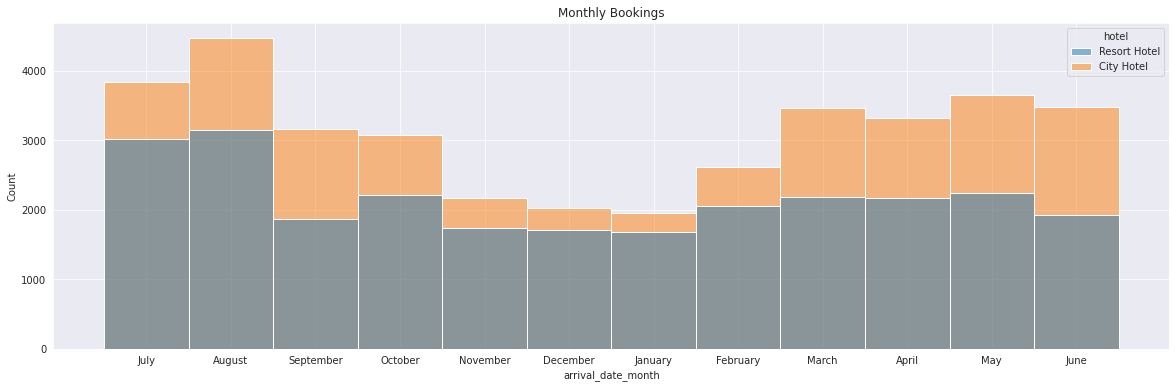

In [37]:
# monthly bookings
plt.figure(figsize=(20,6))
sns.histplot(x= 'arrival_date_month', data= df, hue= 'hotel').set_title ('Monthly Bookings')

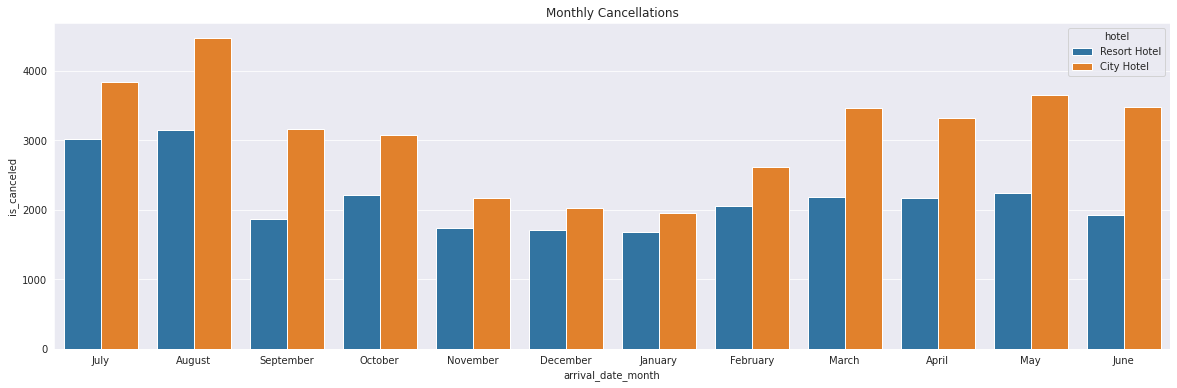

In [38]:
# monthly cancellations
plt.figure(figsize = (20,6))
df_copy= df.copy()
df_copy['is_canceled']= 1
plt.title("Monthly Cancellations")
sns.barplot(x= 'arrival_date_month', y= 'is_canceled', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.show()

In case of city hotel, months with high bookings (March, April, May, June, July, August, September, October) also witnessed more cancellations. Guest numbers for the Resort hotel go down slighty from June to September though variations in bookings and cancellations are less in case of resort hotel. Both hotels have the fewest guests during the winter.

##Market segment wise bookings

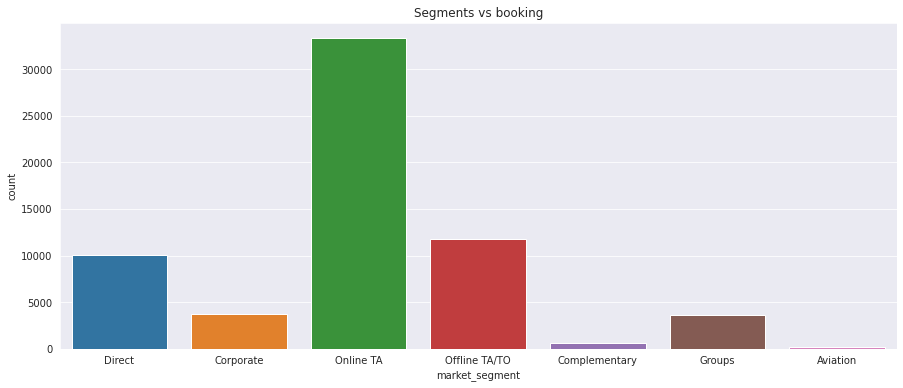

In [39]:
# plot markest segment vs bookings
plt.figure(figsize=(15,6))
plt.title("Segments vs booking")
ax = sns.countplot(x = "market_segment", data = df)
plt.show()

Indirect bookings through online and offline travel agents are higher compared to direct, corporate, groups, complementary and aviation.

##Types of Customers

In [40]:
# check unique values in 'customer_type' column
bookings_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

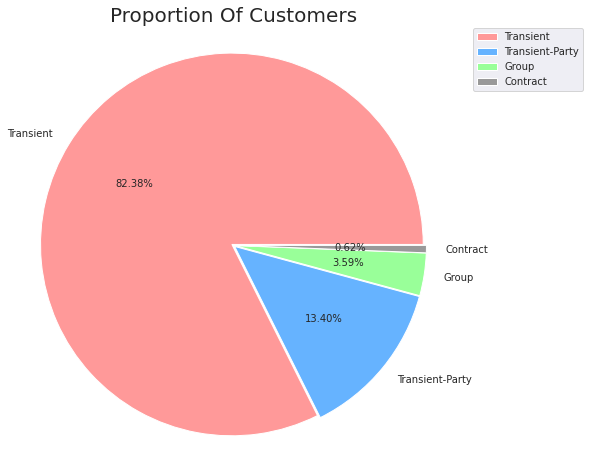

In [41]:
# Plotting the piechart for types of customers
types_of_customer = bookings_df['customer_type'].value_counts().to_list()
labels=['Transient','Transient-Party','Group', 'Contract']
colors = ['#ff9999','#66b3ff','#99ff99','#999999']
explode = (0.01, 0.01, 0.01, 0.01)
plt.figure(figsize=(10,8))
plt.pie(x=types_of_customer,labels=labels, colors=colors, explode=explode, autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Customers", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##Monthly cancellations and customer type

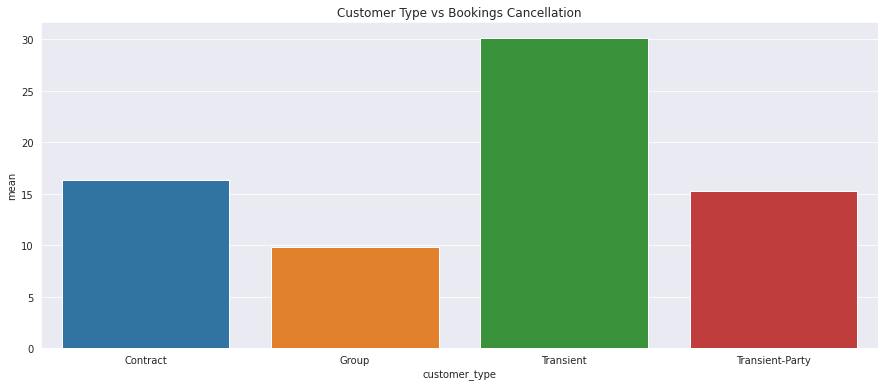

In [42]:
# monthly cancellation vs customer type
plt.figure(figsize=(15,6))
plt.title("Customer Type vs Bookings Cancellation")
a = bookings_df.groupby("customer_type")['is_canceled'].describe()
sns.barplot(x=a.index, y=a["mean"] * 100)

Transient customer types have higher cancellations.

##Relationship between lead time and cancellation

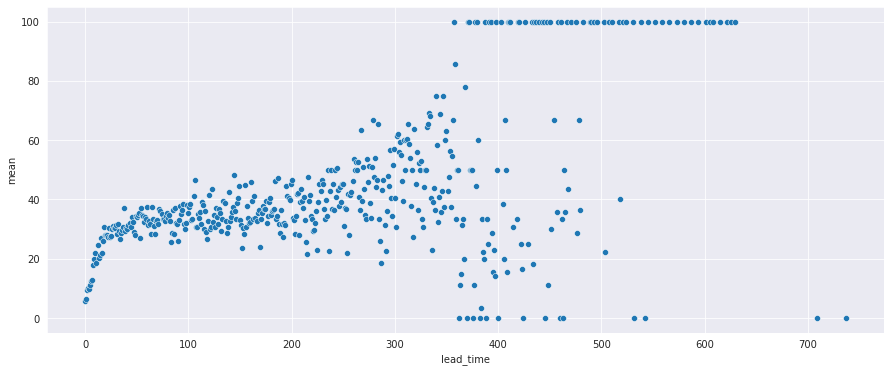

In [43]:
# lead time vs cancellation
plt.figure(figsize=(15,6))
a = bookings_df.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

Lead time has a positive correlation with cancellation.

##Relationship between deposit type and cancellation

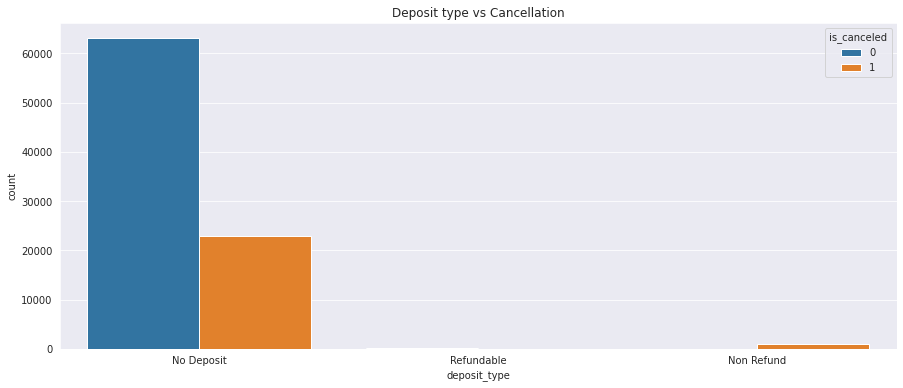

In [44]:
# deposit type vs cancellation
plt.figure(figsize=(15,6))
plt.title("Deposit type vs Cancellation")
sns.countplot(x='deposit_type',data=bookings_df ,hue='is_canceled')

Most of the bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

##Average Daily Rate

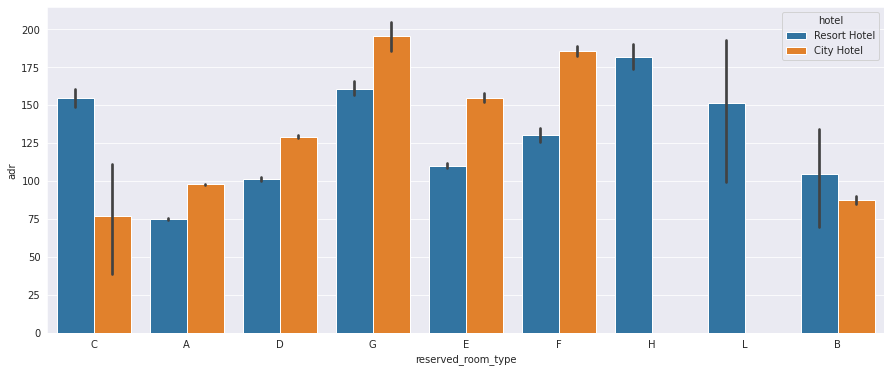

In [45]:
# plotting variation in room type vs adr
plt.figure(figsize=(15,6))
sns.barplot(data = df, x = 'reserved_room_type', y = 'adr', hue = 'hotel')

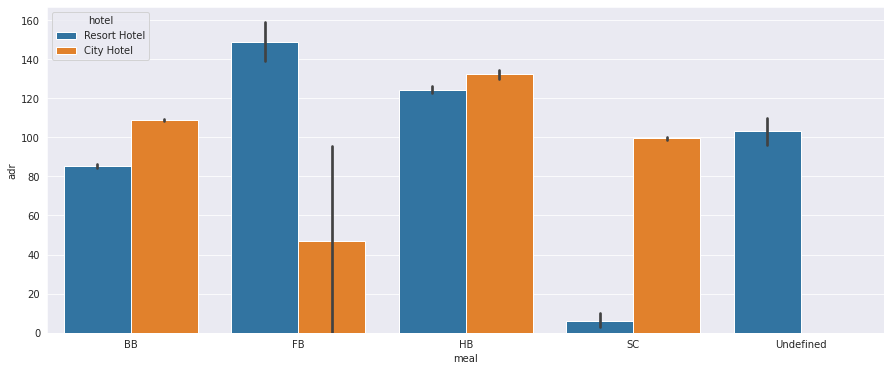

In [46]:
# plotting variation in meal type vs adr
plt.figure(figsize=(15,6))
sns.barplot(data = df, x = 'meal', y = 'adr', hue = 'hotel')

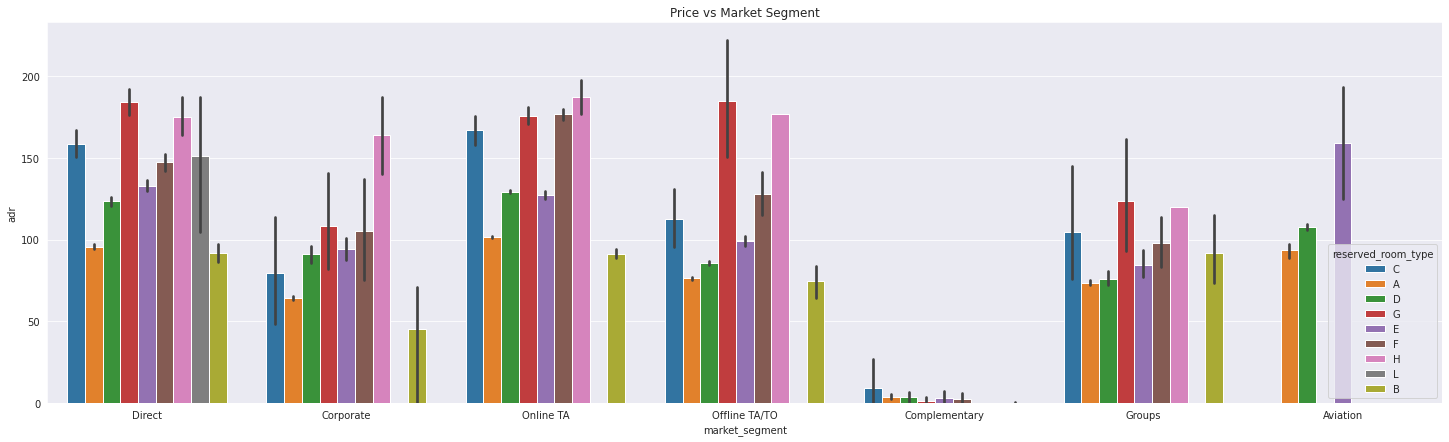

In [47]:
# adr vs market segment based on reserved room types
plt.figure(figsize = (25,7))
plt.title("Price vs Market Segment")
sns.barplot(x= 'market_segment', y= 'adr', hue= 'reserved_room_type', data= df)
plt.show()

##**Conclusion**
As per the EDA, the important factors derived from the given dataset are -


* There are two different types of hotels namely - 'Resort Hotel' and 'City Hotel'.

* Bookings across the years 2016 and 2017 are higher for City Hotels compared to Resort Hotels and do not increase proportionately over the years.

* Top 10 countries from where guests are coming are - PRT, GBR, FRA, ESP, DEU, IRL, ITA, BEL, NLD and USA. Most number of guests i.e. 17573 are coming from PRT.

* Focusing on bookings cancellation, around 30% of bookings were cancelled in City Hotels and 25% in Resort Hotels.

* The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.

* Guest numbers for the Resort hotel go down slightly from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

* Broadly, Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.

* There are four different types of customers namely - Transient, Transient-Party, Group and Contract. Transient customer types have higher cancellations.

* Higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.

* No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.

* Cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.